# Funciones para usar

In [1]:
dir = 'C:/Users/lince/OneDrive/Documentos/TitulacionAplicadas/graficas/'

## Uniformidad

### Función  generadora de momentos

In [2]:
def uniform_mgf(t):
    if t == 0:
        return 1  # MGF at t=0 is always 1
    else:
        return (np.exp(t) - 1) / t

### Función Caracteristica

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def FC_unif(t):
    if t == 0:
        return 1  # FC en t=0 es siempre 1
    else:
        return (np.exp(1j*t) - np.exp(1j*0)) / (1j*t)
    
def modulo(z1, z2):
    dif = z1 - z2
    mod = np.abs(dif)
    return mod

## Independencia

### Prueba del Coleccionista de Cupones 

In [4]:
def encontrar_subcadenas(datos):
    # Generar la cadena sin ceros y punto decimal
    cadena = ''.join(str(d).replace('.', '').lstrip('0') for d in datos)
    # Inicializar un diccionario para guardar las longitudes de las subcadenas
    longitudes_subcadenas = {}

    # Inicializar un conjunto para almacenar los dígitos únicos en la ventana actual
    digitos_unicos = set()
    # Inicializar la longitud de la subcadena actual
    longitud_subcadena = 0

    # Recorrer la cadena dentro de la ventana actual
    for i in range(len(cadena)):
        # Agregar el dígito actual al conjunto de dígitos únicos
        digitos_unicos.add(cadena[i])

        # Incrementar la longitud de la subcadena actual
        longitud_subcadena += 1

        # Verificar si la ventana actual contiene los 10 dígitos del 0 al 9
        if len(digitos_unicos) == 10:
            if longitud_subcadena not in longitudes_subcadenas.keys():
                longitudes_subcadenas[longitud_subcadena] = 1
                digitos_unicos = set()
                longitud_subcadena = 0
            else:
                # Guardar la longitud de la subcadena actual
                longitudes_subcadenas[longitud_subcadena] += 1
                digitos_unicos = set()
                longitud_subcadena = 0

    return longitudes_subcadenas

In [5]:
import scipy.special
def dis(x):
    return dens(x)-dens(x-1)
def dens(x):
    return sum([scipy.special.binom(10, i)*(-1)**i*(1-i/10)**(x-1) for i in range(11)]) #

### Prueba Geométrica

In [6]:
from scipy.stats import geom
def GeoTest(a,b,muestra):
    l = 1 
    densidades = []
    for i in range(len(muestra)):
        if a<muestra[i] and muestra[i]<b:
            densidades.append(l)
            l = 1
        else:
            l += 1
    return densidades

# Mapeo Logístico

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random 
from scipy.stats import beta 

def logistic_map(r, x, num_iterations):
    results = [x]  # Store the initial condition
    for _ in range(num_iterations):
        x = r * x * (1 - x)  # Apply the logistic map formula
        results.append(x)
    return results

initial = 0.02024
initial2 = random.uniform(0,1)
n = 1000
# betas = [beta.pdf() for i in range(n)]
muestra_log = np.array(logistic_map(4,initial,n))
muestra_log2 = np.array(logistic_map(4,initial2,n))
muestra_unif = [beta.cdf(muestra_log[i],0.5,0.5) for i in range(n)]

## Convergencia a la ditribución $beta(0.5,0.5)$ con una distribución inicial en el (0,1)

In [8]:
def Log_comp(dist_inicial,nIt):
    if nIt==0:
        return dist_inicial
    else:
        comp = [logistic_map(4,dist_inicial[i],1)[1] for i in range(len(dist_inicial))]
        for i in range(nIt-1):
            comp =  [logistic_map(4,comp[i],1)[1] for i in range(len(dist_inicial))]
        return comp   

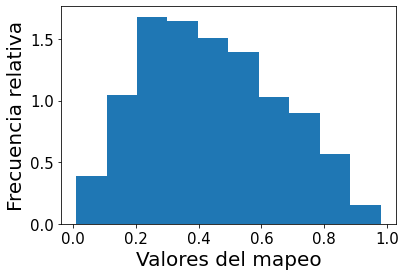

In [9]:
n=0
dist_inicial = np.random.triangular(0, 0.3, 1, 1000) 
muestra_conv = Log_comp(dist_inicial,n)

plt.hist(muestra_conv, density = True)
# plt.title('Iteración no.'+str(n)+' Mapeo Logístico con \n Distribución inicial triangular',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores del mapeo',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'Logist/Convergencia/LogConv_histogramaIt0.png', bbox_inches = "tight")
plt.show()

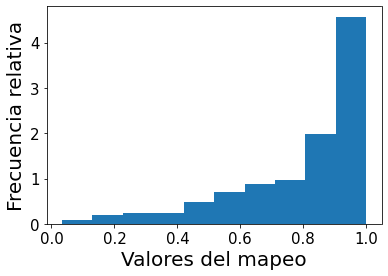

In [10]:
n=1
dist_inicial = np.random.triangular(0, 0.3, 1, 1000) 
muestra_conv = Log_comp(dist_inicial,n)

plt.hist(muestra_conv, density = True)
# plt.title('Iteración no.'+str(n)+' Mapeo Logístico con \n Distribución inicial triangular',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores del mapeo',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'Logist/Convergencia/LogConv_histogramaIt1.png', bbox_inches = "tight")
plt.show()

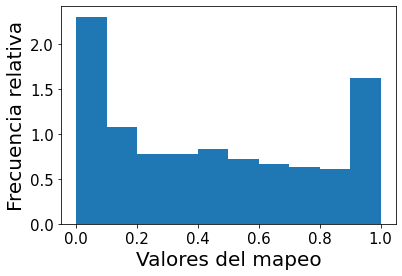

In [11]:
n=2
dist_inicial = np.random.triangular(0, 0.3, 1, 1000) 
muestra_conv = Log_comp(dist_inicial,n)

plt.hist(muestra_conv, density = True)
# plt.title('Iteración no.'+str(n)+' Mapeo Logístico con \n Distribución inicial triangular',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores del mapeo',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'Logist/Convergencia/LogConv_histogramaIt2.png', bbox_inches = "tight")
plt.show()

## Uniformidad

### Histograma

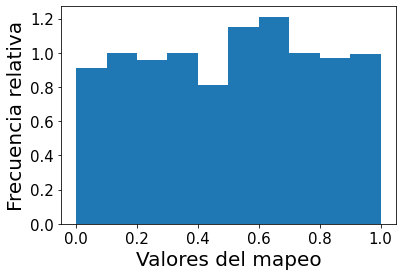

In [12]:
plt.hist(muestra_unif, density = True)
# plt.title('Mapeo Logístico \n "Uniformizado"',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores del mapeo',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'Logist/Uniformidad/LogUnif_histograma.png', bbox_inches = "tight")
plt.show()

### Momentos

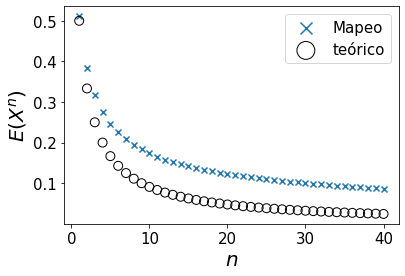

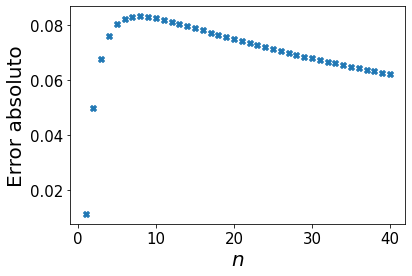

In [13]:
n_momentos = 40
momentos_log = np.array([np.mean(muestra_log**j) for j in range(1,n_momentos+1)])
momentos_teo = np.array([1/(i+1) for i in range(1,n_momentos+1)])


plt.scatter(range(1,n_momentos+1),momentos_log,label="Mapeo",marker= "x")
plt.scatter(range(1,n_momentos+1),momentos_teo ,label="teórico",s=80, facecolors='none', edgecolors='k')
# plt.title('Momentos',fontsize = 30)
plt.ylabel('$E(X^n)$',fontsize = 20)
plt.xlabel('$n$',fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(markerscale=2,fontsize=15,loc=0)
plt.savefig(dir+'Logist/Uniformidad/Log_Momentos.png', bbox_inches = "tight")
plt.show()


plt.scatter(range(1,n_momentos+1),abs(momentos_log-momentos_teo),label="fila",marker= "X")
# plt.title('Error absoluto',fontsize = 30)
plt.ylabel('Error absoluto',fontsize = 20)
plt.xlabel('$n$',fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
# plt.legend(markerscale=2,fontsize=15)
plt.savefig(dir+'Logist/Uniformidad/Log_MomentosError.png', bbox_inches = "tight")
plt.show()

### Función Generadora de Momentos

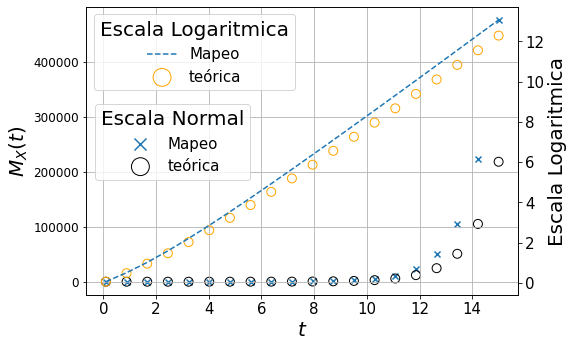

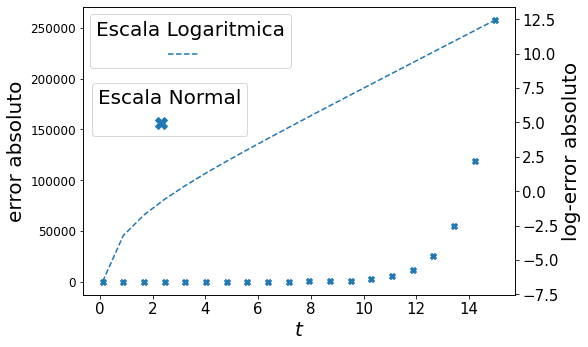

In [14]:
intervalo = np.linspace(0.1,15,20)
FGM_log = np.array([np.mean(np.exp(t*muestra_log)) for t in intervalo]) 
FGM_teo = np.array([uniform_mgf(i) for i in intervalo])


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,FGM_log,label="Mapeo",marker= "x")
ax.scatter(intervalo,FGM_teo,label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Función Generadora de Momentos",size =30)
ax.set_ylabel("$M_X(t)$",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
ax.grid(True)
ax.legend(title="Escala Normal",loc=(0.02,0.4),markerscale=2,fontsize=15,title_fontsize=20)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(FGM_log),label="Mapeo",linestyle='--')
ax2.scatter(intervalo,np.log(FGM_teo),label="teórica",s=80, facecolors='none', edgecolors='orange')
ax2.set_ylabel("Escala Logaritmica",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=0,markerscale=2,fontsize=15,title_fontsize=20)
ax2.tick_params(axis='y', labelsize=15)
plt.draw()
plt.savefig(dir+'Logist/Uniformidad/Log_FGM.png', bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,abs(FGM_log-FGM_teo),label=" ",marker= "X")
# ax.set_title("Comparación del error",size =30)
ax.set_ylabel("error absoluto",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title="Escala Normal",loc=(0.02,0.55),markerscale=2,fontsize=15,title_fontsize=20)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(abs(FGM_log-FGM_teo)),label=" ",linestyle='--')
ax2.set_ylabel("log-error absoluto",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=0,markerscale=2,fontsize=15,title_fontsize=20)
# ax2.legend(title="Escala Logaritmica",loc=(0.5,-0.45),markerscale=2,fontsize=15,title_fontsize=20)
ax2.tick_params(axis='y', labelsize=15)

plt.draw()
plt.savefig(dir+'Logist/Uniformidad/Log_ErrorFGM.png', bbox_inches = "tight")
plt.show()

### Función característica

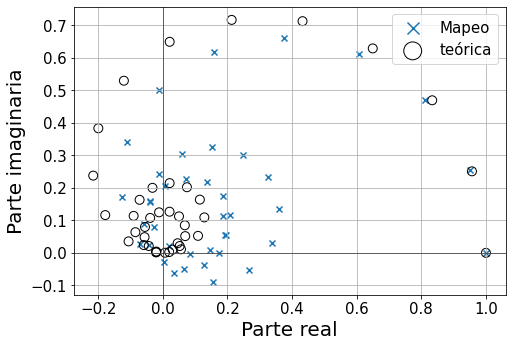

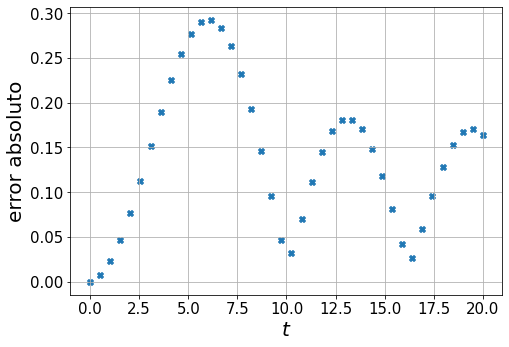

In [15]:
intervalo = np.linspace(0,20,40)
FC_log = np.array([np.mean(np.exp(1j*t*muestra_log)) for t in intervalo])  
FC_teo = np.array([FC_unif(i) for i in intervalo])

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(np.real(FC_log), np.imag(FC_log),label="Mapeo",marker= "x")
ax.scatter(np.real(FC_teo), np.imag(FC_teo),label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Función Característica",size =30)
ax.set_ylabel("Parte imaginaria",fontsize =20)
ax.set_xlabel("Parte real",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Logist/Uniformidad/Log_FC.png', bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,modulo(FC_log,FC_teo),label="error",marker= "X")
# ax.set_title("Comparación del error",size =30)
ax.set_ylabel("error absoluto",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
# ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
ax.grid(True)
plt.draw()
plt.savefig(dir+'Logist/Uniformidad/Log_FCError.png', bbox_inches = "tight")
plt.show()

## Independencia

### Prueba del Coleccionista de Cupones

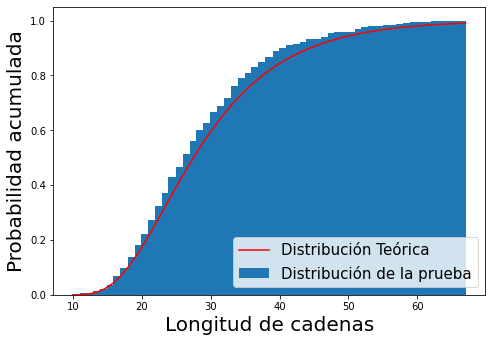

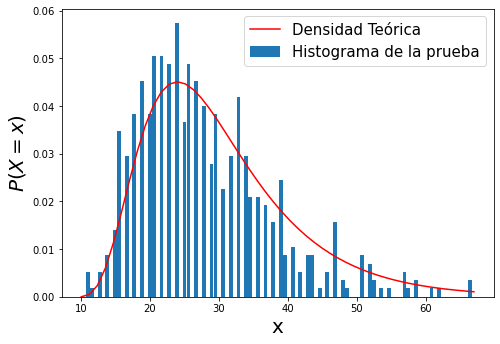

In [16]:
distribucion = encontrar_subcadenas(muestra_unif)
datos = [key for key, val in distribucion.items() for _ in range(val)]
x = np.linspace(10,max(datos))

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
# ax.set_title("Prueba del \n Coleccionista de Cupones",size =30)
ax.set_ylabel("Probabilidad acumulada",fontsize =20)
ax.set_xlabel("Longitud de cadenas",fontsize =20)
ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución de la prueba")
ax.plot(x,dens(x),color="red",label="Distribución Teórica")
ax.legend(loc=4,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Logist/Independencia/log_dist_CCT.png', bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])

h, bins = np.histogram(datos,bins=100)
h = h/sum(h)

# ax.set_title("Prueba del \n Coleccionista de Cupones",size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,dis(x),color="red",label="Densidad Teórica")
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Histograma de la prueba" )
# ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución Mapeo")
# ax.plot(x,dens(x),color="red",label="Distribución Geométrica")
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Logist/Independencia/Log_dens_CCT.png', bbox_inches = "tight")
plt.show()

### Prueba Geométrica

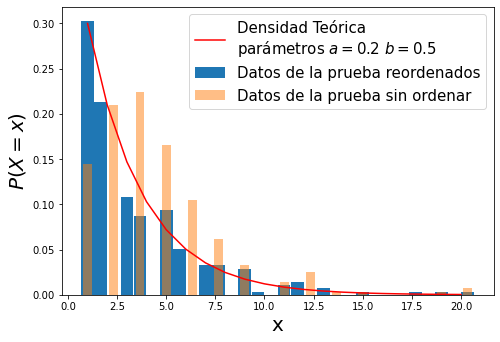

In [17]:
## Reordenamos para obtener "más independencia"
orden = np.argsort(muestra_log2[:-1])
muestra_unifOrd = [muestra_unif[i] for i in orden]

a = 0.2
b = 0.5
c= b-a
datos_Ord = GeoTest(a,b,muestra_unifOrd)
datos_NO_Ord = GeoTest(a,b,muestra_unif)
x = [i for i in range(1,max(datos_Ord))]

h, bins = np.histogram(datos_Ord,bins=30)
h = h/sum(h)

h2, bins2 = np.histogram(datos_NO_Ord,bins=30)
h2 = h2/sum(h2)

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])

# ax.set_title("Prueba Geométrica con \n parámetros $a=$"+str(a)+" $b=$"+str(b),size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,geom.pmf(x,c),color="red",label="Densidad Teórica\nparámetros $a=$"+str(a)+" $b=$"+str(b))
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Datos de la prueba reordenados" )
ax.bar(bins[:-1],h2,width=((max(bins2)-min(bins2))/len(bins2)),label="Datos de la prueba sin ordenar",alpha=0.5 )
# ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución Mapeo")
# ax.plot(x,dens(x),color="red",label="Distribución Geométrica")
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Logist/Independencia/Log_PG.png', bbox_inches = "tight")
plt.show()

# Mapeo "Tienda de Campaña"

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import random 

def tent_map(x):
    if 0. <= x and x< 0.5:
        return 1.999 * x
    elif 0.5 <= x and x< 1:
        return 1.999 * (1 - x)

def iterate_tent_map(x_initial, n):
    x = x_initial
    results = []
    for _ in range(n):
        x = tent_map(x)
        if x is not None:
            results.append(x)
        else:
            break  # Exit loop if x is out of range
    return results

np.random.seed(2024)
initial = random.uniform(0,1)
muestra_tent = np.array(iterate_tent_map(initial,1000))
# print(initial)# al rededor de 8 

## Uniformidad

### Histograma

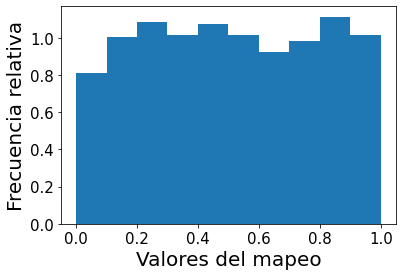

In [19]:
plt.hist(muestra_tent, density = True)
# plt.title('',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores del mapeo',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'Tent/Uniformidad/Tent_histograma.png', bbox_inches = "tight")
plt.show()

### Momentos

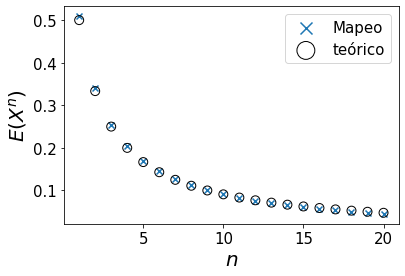

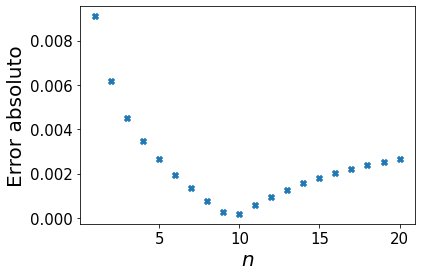

In [20]:
n_momentos = 20
momentos_tent = np.array([np.mean(muestra_tent**j) for j in range(1,n_momentos+1)])
momentos_teo = np.array([1/(i+1) for i in range(1,n_momentos+1)])


plt.scatter(range(1,n_momentos+1),momentos_tent,label="Mapeo",marker= "x")
plt.scatter(range(1,n_momentos+1),momentos_teo ,label="teórico",s=80, facecolors='none', edgecolors='k')
# plt.title('Momentos',fontsize = 30)
plt.ylabel('$E(X^n)$',fontsize = 20)
plt.xlabel('$n$',fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(markerscale=2,fontsize=15,loc=0)
plt.savefig(dir+'Tent/Uniformidad/Tent_Momentos.png', bbox_inches = "tight")
plt.show()


plt.scatter(range(1,n_momentos+1),abs(momentos_tent-momentos_teo),label="fila",marker= "X")
# plt.title('Error absoluto',fontsize = 30)
plt.ylabel('Error absoluto',fontsize = 20)
plt.xlabel('$n$',fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
# plt.legend(markerscale=2,fontsize=15)
plt.savefig(dir+'Tent/Uniformidad/Tent_MomentosError.png', bbox_inches = "tight")
plt.show()

### Función generadora de Momentos

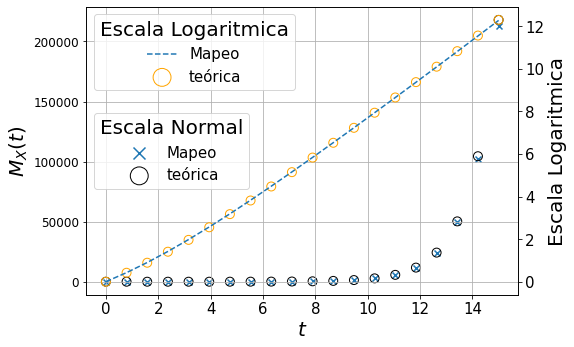

C:\Users\lince\AppData\Local\Temp/ipykernel_15576/1834982792.py:39: RuntimeWarning: divide by zero encountered in log
  ax2.plot(intervalo,np.log(abs(FGM_tent-FGM_teo)),label=" ",linestyle='--')


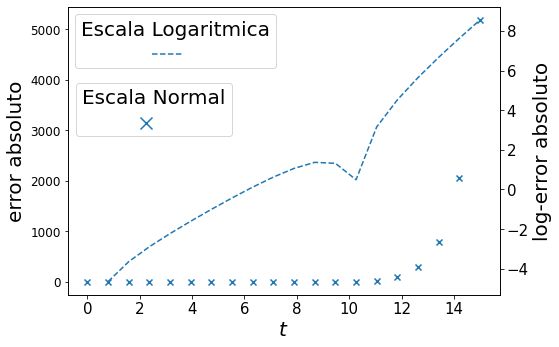

In [21]:
intervalo = np.linspace(0,15,20)
FGM_tent = np.array([np.mean(np.exp(t*muestra_tent)) for t in intervalo]) 
FGM_teo = np.array([uniform_mgf(i) for i in intervalo])


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,FGM_tent,label="Mapeo",marker= "x")
ax.scatter(intervalo,FGM_teo,label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Función Generadora de Momentos",size =30)
ax.set_ylabel("$M_X(t)$",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
ax.grid(True)
ax.legend(title="Escala Normal",loc=6,markerscale=2,fontsize=15,title_fontsize=20)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(FGM_tent),label="Mapeo",linestyle='--')
ax2.scatter(intervalo,np.log(FGM_teo),label="teórica",s=80, facecolors='none', edgecolors='orange')
ax2.set_ylabel("Escala Logaritmica",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=0,markerscale=2,fontsize=15,title_fontsize=20)
ax2.tick_params(axis='y', labelsize=15)
plt.draw()
plt.savefig(dir+'Tent/Uniformidad/Tent_FGM.png', bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,abs(FGM_tent-FGM_teo),label=" ",marker= "x")
# ax.set_title("Comparación del error",size =30)
ax.set_ylabel("error absoluto",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title="Escala Normal",loc=(0.02,0.55),markerscale=2,fontsize=15,title_fontsize=20)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(abs(FGM_tent-FGM_teo)),label=" ",linestyle='--')
ax2.set_ylabel("log-error absoluto",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=0,markerscale=2,fontsize=15,title_fontsize=20)
# ax2.legend(title="Escala Logaritmica",loc=(0.5,-0.45),markerscale=2,fontsize=15,title_fontsize=20)
ax2.tick_params(axis='y', labelsize=15)

plt.draw()
plt.savefig(dir+'Tent/Uniformidad/Tent_ErrorFGM.png', bbox_inches = "tight")
plt.show()

### Función Característica

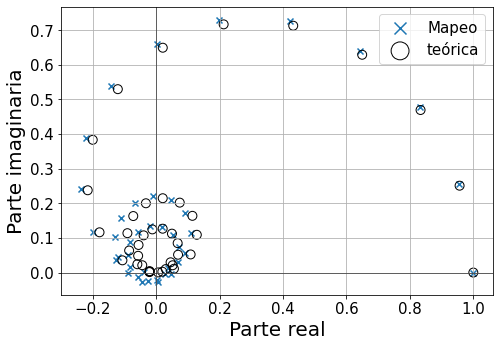

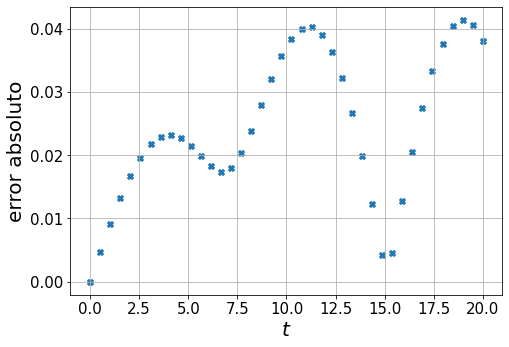

In [22]:
intervalo = np.linspace(0,20,40)
FC_tent = np.array([np.mean(np.exp(1j*t*muestra_tent)) for t in intervalo])  
FC_teo = np.array([FC_unif(i) for i in intervalo])

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(np.real(FC_tent), np.imag(FC_tent),label="Mapeo",marker= "x")
ax.scatter(np.real(FC_teo), np.imag(FC_teo),label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Función Característica",size =30)
ax.set_ylabel("Parte imaginaria",fontsize =20)
ax.set_xlabel("Parte real",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Tent/Uniformidad/Tent_FC.png', bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,modulo(FC_tent,FC_teo),label="Mapeo",marker= "X")
# ax.set_title("Comparación del error",size =30)
ax.set_ylabel("error absoluto",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(True)
plt.draw()
plt.savefig(dir+'Tent/Uniformidad/Tent_FCError.png', bbox_inches = "tight")
plt.show()

## Independencia

### Prueba del Coleccionista de Cupones

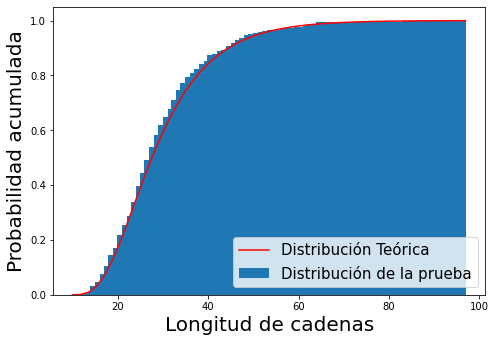

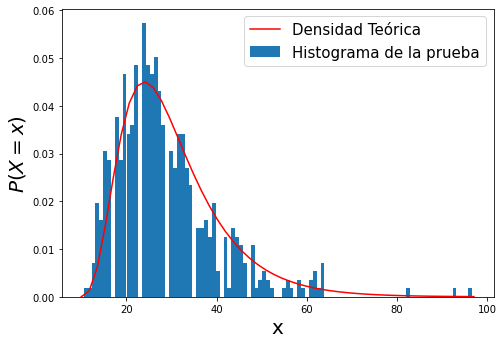

In [23]:
distribucion = encontrar_subcadenas(muestra_tent)
datos = [key for key, val in distribucion.items() for _ in range(val)]
x = np.linspace(10,max(datos))

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
# ax.set_title("Prueba del \n Coleccionista de Cupones",size =30)
ax.set_ylabel("Probabilidad acumulada",fontsize =20)
ax.set_xlabel("Longitud de cadenas",fontsize =20)
ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución de la prueba")
ax.plot(x,dens(x),color="red",label="Distribución Teórica")
ax.legend(loc=4,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Tent/Independencia/Tent_dsit_CCT.png', bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])

h, bins = np.histogram(datos,bins=100)
h = h/sum(h)

# ax.set_title("Prueba del \n Coleccionista de Cupones",size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,dis(x),color="red",label="Densidad Teórica")
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Histograma de la prueba" )
# ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución Mapeo")
# ax.plot(x,dens(x),color="red",label="Distribución Geométrica")
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Tent/Independencia/Tent_dens_CCT.png', bbox_inches = "tight")
plt.show()

### Prueba Geométrica

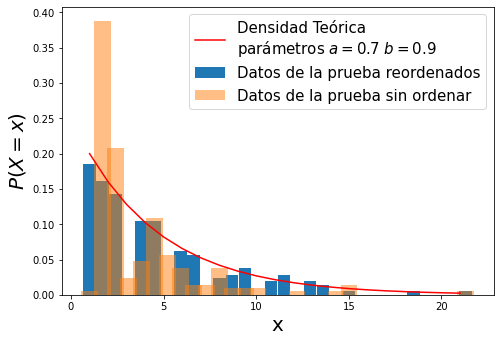

In [24]:
## Reordenamos para obtener "más independencia"
orden = np.argsort(muestra_log[:-1])
muestra_tentOrd = [muestra_tent[i] for i in orden]

a = 0.7
b = 0.9
c= b-a
datos_Ord = GeoTest(a,b,muestra_tentOrd)
x = [i for i in range(1,max(datos_Ord))]
datos_NO_Ord= GeoTest(a,b,muestra_tent)

h, bins = np.histogram(datos_Ord,bins=30)
h = h/sum(h)

h2, bins2 = np.histogram(datos_NO_Ord,bins=30)
h2 = h2/sum(h2)

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])

# ax.set_title("Prueba Geométrica con \n parámetros $a=$"+str(a)+" $b=$"+str(b),size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,geom.pmf(x,c),color="red",label="Densidad Teórica\nparámetros $a=$"+str(a)+" $b=$"+str(b))
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Datos de la prueba reordenados" )
ax.bar(bins[:-1],h2,width=((max(bins2)-min(bins2))/len(bins2)),label="Datos de la prueba sin ordenar",alpha=0.5 )
# ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución Mapeo")
# ax.plot(x,dens(x),color="red",label="Distribución Geométrica")
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'Tent/Independencia/Tent_PG.png', bbox_inches = "tight")
plt.show()

# Regla 30

In [25]:
import numpy as np
import matplotlib.pyplot as plt

def apply_rule30_rule(left, center, right):
    return 1 if (left==1 and center==0 and right ==0) \
            or (left==0 and center==1 and right ==1) \
            or (left==0 and center==1 and right ==0) \
            or (left==0 and center==0 and right ==1) else 0

def generate_rule30(initial_condition, num_iterations):
    result = [initial_condition]
    for _ in range(num_iterations - 1):
        current_row = result[-1]
        next_row = [0] * len(current_row)
        for i in range(len(current_row)):
            left = current_row[i - 1]
            center = current_row[i]
            right = current_row[(i + 1) % len(current_row)]
            next_row[i] = apply_rule30_rule(left, center, right)
        result.append(next_row)
    result_matrix = np.array(result)
    presicion = [1/int('1'*len(initial_condition),2),1/int('1'*num_iterations,2)]
    muestra_col = np.array([int(''.join(str(i) for i in result_matrix[:,j]),2)*presicion[0] for j in range(np.shape(result_matrix)[1])])
    muestra_fila = np.array([int(''.join(str(i) for i in result_matrix[j,:]),2)*presicion[1] for j in range(np.shape(result_matrix)[0])])

    return result_matrix,muestra_col,muestra_fila

def display_rule30(result_matrix):
    plt.imshow(result_matrix, cmap='Greys', interpolation='nearest')
    plt.show()

np.random.seed(2024)
num_IC = 1000
initial_condition = np.random.binomial(size=num_IC, n=1, p= 0.5)

num_iterations = 1000
result_matrix, muestra_col, muestra_fila = generate_rule30(initial_condition, num_iterations)

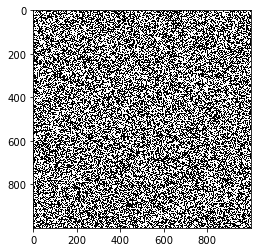

In [26]:
display_rule30(result_matrix)

In [27]:
import sys
sys.float_info.epsilon

2.220446049250313e-16

## Uniformidad

### Histogramas

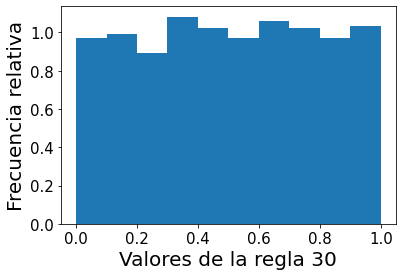

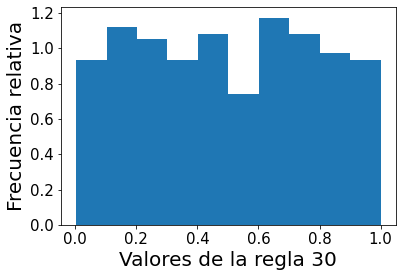

In [28]:
###### columnas #########
plt.hist(muestra_col,density=True)
# plt.title('Columnas',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores de la regla 30',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'R30/Uniformidad/muestra_col.png', bbox_inches = "tight")
plt.show()
###### filas #########
plt.hist(muestra_fila,density = True)
# plt.title('Filas',fontsize = 30)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.xlabel('Valores de la regla 30',fontsize = 20)
plt.ylabel('Frecuencia relativa',fontsize = 20)
plt.savefig(dir+'R30/Uniformidad/muestra_fila.png', bbox_inches = "tight")
plt.show()

### Momentos

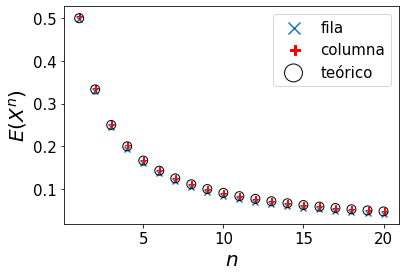

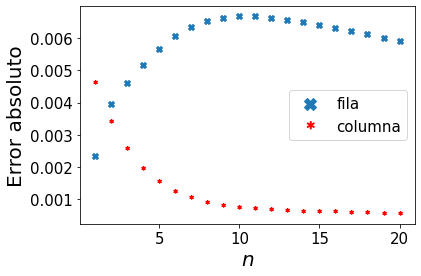

In [29]:
n_momentos = 20
momentos_fila = np.array([np.mean(muestra_fila**j) for j in range(1,n_momentos+1)])
momentos_col = np.array([np.mean(muestra_col**j) for j in range(1,n_momentos+1)])
momentos_teo = np.array([1/(i+1) for i in range(1,n_momentos+1)])


plt.scatter(range(1,n_momentos+1),momentos_fila,label="fila",marker= "x")
plt.scatter(range(1,n_momentos+1),momentos_col,label="columna",marker= "$+$",color='r')
plt.scatter(range(1,n_momentos+1),momentos_teo ,label="teórico",s=80, facecolors='none', edgecolors='k')
# plt.title('Momentos',fontsize = 30)
plt.ylabel('$E(X^n)$',fontsize = 20)
plt.xlabel('$n$',fontsize = 20)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.legend(markerscale=2,fontsize=15,loc=0)
plt.savefig(dir+'R30/Uniformidad/momentos_r30.png', bbox_inches = "tight")
plt.show()


plt.scatter(range(1,n_momentos+1),abs(momentos_fila-momentos_teo),label="fila",marker= "X")
plt.scatter(range(1,n_momentos+1),abs(momentos_col-momentos_teo),label="columna",marker= "$*$",color='r')
# plt.title('Error absoluto',fontsize = 30)
plt.ylabel('Error absoluto',fontsize = 20)
plt.xlabel('$n$',fontsize = 20)
plt.legend(markerscale=2,fontsize=15,loc=0)
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
# plt.legend(markerscale=2,fontsize=15)
plt.savefig(dir+'R30/Uniformidad/ErrorMomentos_r30.png', bbox_inches = "tight")
plt.show()


### Función generadora de momentos

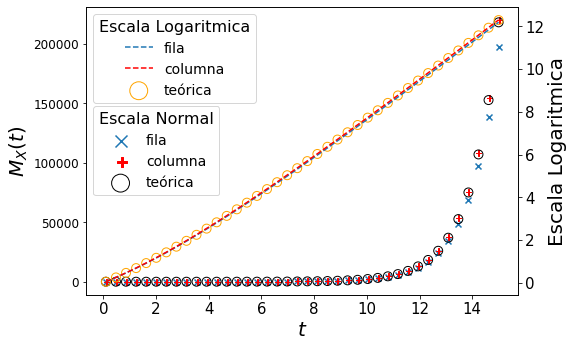

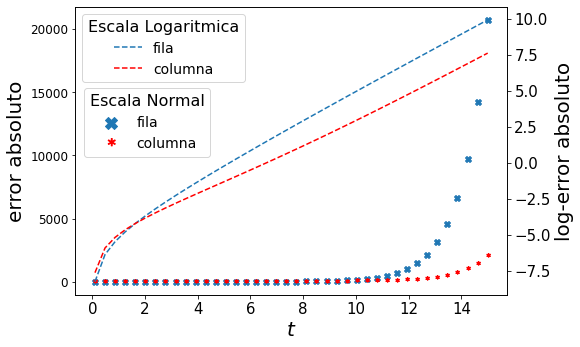

In [30]:
intervalo = np.linspace(0.1,15,40)
FGM_col = np.array([np.mean(np.exp(t*muestra_col)) for t in intervalo]) 
FGM_fila = np.array([np.mean(np.exp(t*muestra_fila)) for t in intervalo]) 
FGM_teo = np.array([uniform_mgf(i) for i in intervalo])


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,FGM_fila,label="fila",marker= "x")
ax.scatter(intervalo,FGM_col,label="columna",marker= "$+$",color='r')
ax.scatter(intervalo,FGM_teo,label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Función Generadora de Momentos",size =30)
ax.set_ylabel("$M_X(t)$",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title="Escala Normal",loc=6,markerscale=2,fontsize=14,title_fontsize=16)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(abs(FGM_fila)),label="fila",linestyle='--')
ax2.plot(intervalo,np.log(abs(FGM_col)),label="columna",linestyle='--',color='r')
ax2.scatter(intervalo,np.log(abs(FGM_teo)),label="teórica",s=80, facecolors='none', edgecolors='orange')
ax2.set_ylabel("Escala Logaritmica",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=0,markerscale=2,fontsize=14,title_fontsize=16)
ax2.tick_params(axis='y', labelsize=15)
plt.draw()
plt.savefig(dir+'R30/Uniformidad/FGM_r30.png', bbox_inches = "tight")
plt.show()


fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,abs(FGM_fila-FGM_teo),label="fila",marker= "X")
ax.scatter(intervalo,abs(FGM_col-FGM_teo),label="columna",marker= "$*$",color='r')
# ax.set_title("Comparación del error",size =30)
ax.set_ylabel("error absoluto",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=12)
ax.legend(title="Escala Normal",loc=(0.02,0.48),markerscale=2,fontsize=14,title_fontsize=16)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(abs(FGM_fila-FGM_teo)),label="fila",linestyle='--')
ax2.plot(intervalo,np.log(abs(FGM_col-FGM_teo)),label="columna",linestyle='--',color='r')
ax2.set_ylabel("log-error absoluto",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=0,markerscale=2,fontsize=14,title_fontsize=16)
ax2.tick_params(axis='y', labelsize=15)
plt.draw()
plt.savefig(dir+'R30/Uniformidad/ErrorFGM_r30.png', bbox_inches = "tight")
plt.show()

### Funcion Característica

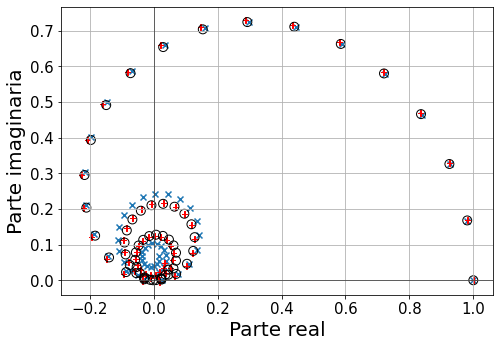

C:\Users\lince\AppData\Local\Temp/ipykernel_15576/3996367250.py:37: RuntimeWarning: divide by zero encountered in log
  ax2.plot(intervalo,np.log(modulo(FC_fila,FC_teo)),label="fila",linestyle='--')
C:\Users\lince\AppData\Local\Temp/ipykernel_15576/3996367250.py:38: RuntimeWarning: divide by zero encountered in log
  ax2.plot(intervalo,np.log(modulo(FC_col,FC_teo)),label="columna",linestyle='--',color='r')


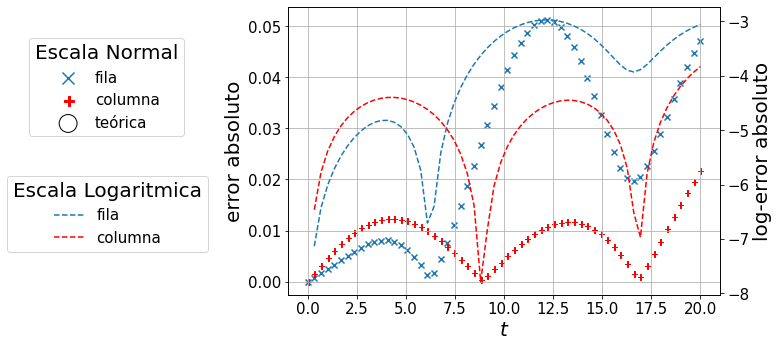

In [31]:
intervalo = np.linspace(0,20,60)
FC_col = np.array([np.mean(np.exp(1j*t*muestra_col)) for t in intervalo]) 
FC_fila = np.array([np.mean(np.exp(1j*t*muestra_fila)) for t in intervalo]) 
FC_teo = np.array([FC_unif(i) for i in intervalo])

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(np.real(FC_fila), np.imag(FC_fila),label="fila",marker= "x")
ax.scatter(np.real(FC_col), np.imag(FC_col),label="columna",marker= "$+$",color='r')
ax.scatter(np.real(FC_teo), np.imag(FC_teo),label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Función Característica",size =30)
ax.set_ylabel("Parte imaginaria",fontsize =20)
ax.set_xlabel("Parte real",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.axhline(0, color='black', linewidth=0.5)
ax.axvline(0, color='black', linewidth=0.5)
ax.grid(True)
# ax.legend(loc=(0.37,-0.45),markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Uniformidad/R30_FC.png', bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
ax.scatter(intervalo,modulo(FC_fila,FC_teo),label="fila",marker= "x")
ax.scatter(intervalo,modulo(FC_col,FC_teo),label="columna",marker= "$+$",color='r')
ax.scatter(np.NaN, np.NaN,label="teórica",s=80, facecolors='none', edgecolors='k')
# ax.set_title("Comparación del error",size =30)
ax.set_ylabel("error absoluto",fontsize =20)
ax.set_xlabel("$t$",fontsize =20)
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=15)
ax.grid(True)
ax.legend(title="Escala Normal",loc=(-0.60,.55),markerscale=2,fontsize=15,title_fontsize=20)
ax2 = ax.twinx()
ax2.plot(intervalo,np.log(modulo(FC_fila,FC_teo)),label="fila",linestyle='--')
ax2.plot(intervalo,np.log(modulo(FC_col,FC_teo)),label="columna",linestyle='--',color='r')
ax2.set_ylabel("log-error absoluto",fontsize =20)
ax2.legend(title="Escala Logaritmica",loc=(-0.65,.15),markerscale=2,fontsize=15,title_fontsize=20)
ax2.tick_params(axis='y', labelsize=15)
# ax2.grid(True)
plt.draw()
plt.savefig(dir+'R30/Uniformidad/R30_FCError.png', bbox_inches = "tight")
plt.show()

## Independencia

### Prueba del Coleccionista de Cupones

#### Columnas

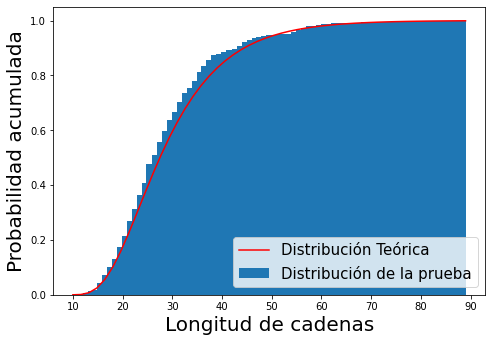

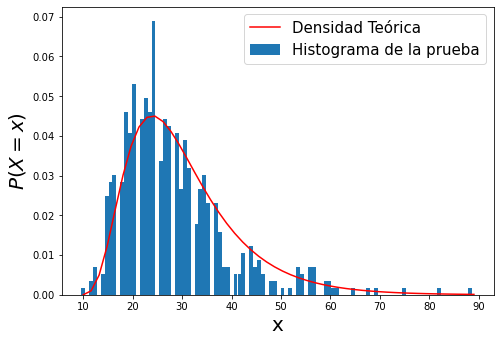

In [32]:
distribucion = encontrar_subcadenas(muestra_col)
datos = [key for key, val in distribucion.items() for _ in range(val)]
x = np.linspace(10,max(datos))

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
# ax.set_title("Prueba del \n Coleccionista de Cupones\n Columnas",size =30)
ax.set_ylabel("Probabilidad acumulada",fontsize =20)
ax.set_xlabel("Longitud de cadenas",fontsize =20)
ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución de la prueba")
ax.plot(x,dens(x),color="red",label="Distribución Teórica")
ax.legend(loc=4,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Independencia/R30_col_distCCT.png', bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
h, bins = np.histogram(datos,bins=100)
h = h/sum(h)
# ax.set_title("Prueba del \n Coleccionista de Cupones\n Columnas",size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,dis(x),color="red",label="Densidad Teórica")
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Histograma de la prueba" )
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Independencia/R30_col_densCCT.png', bbox_inches = "tight")
plt.show()

#### Filas

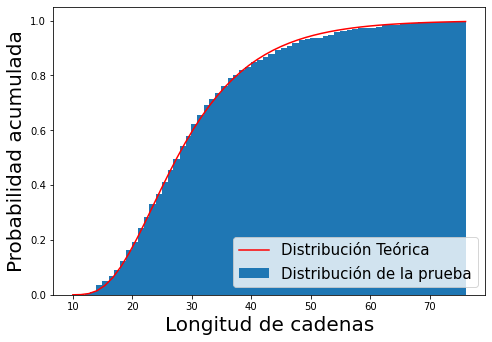

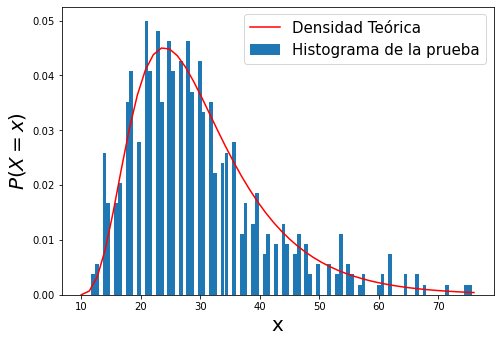

In [33]:
distribucion = encontrar_subcadenas(muestra_fila)
datos = [key for key, val in distribucion.items() for _ in range(val)]
x = np.linspace(10,max(datos))

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
# ax.set_title("Prueba del \n Coleccionista de Cupones\n Filas",size =30)
ax.set_ylabel("Probabilidad acumulada",fontsize =20)
ax.set_xlabel("Longitud de cadenas",fontsize =20)
ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución de la prueba")
ax.plot(x,dens(x),color="red",label="Distribución Teórica")
ax.legend(loc=4,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Independencia/R30_fila_distCCT.png', bbox_inches = "tight")
plt.show()

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])
h, bins = np.histogram(datos,bins=100)
h = h/sum(h)
# ax.set_title("Prueba del \n Coleccionista de Cupones\n Filas",size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,dis(x),color="red",label="Densidad Teórica")
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Histograma de la prueba" )
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Independencia/R30_fila_densCCT.png', bbox_inches = "tight")
plt.show()

### Prueba Geométrica

#### Columnas

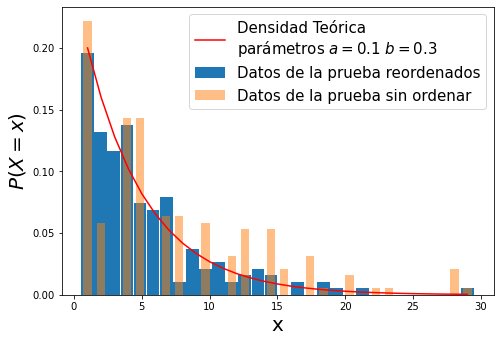

In [34]:
## Reordenamos para obtener "más independencia"
orden = np.argsort(muestra_log[:-1])
muestra_colOrd = [muestra_col[i] for i in orden]

a = 0.1
b = 0.3
c= b-a
datos_Ord = GeoTest(a,b,muestra_colOrd)
x = [i for i in range(1,max(datos_Ord))]
datos_NO_Ord= GeoTest(a,b,muestra_col)

h, bins = np.histogram(datos_Ord,bins=30)
h = h/sum(h)

h2, bins2 = np.histogram(datos_NO_Ord,bins=30)
h2 = h2/sum(h2)

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])

# ax.set_title("Prueba Geométrica Columnas \n con parámetros $a=$"+str(a)+" $b=$"+str(b),size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,geom.pmf(x,c),color="red",label="Densidad Teórica\nparámetros $a=$"+str(a)+" $b=$"+str(b))
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Datos de la prueba reordenados" )
ax.bar(bins[:-1],h2,width=((max(bins2)-min(bins2))/len(bins2)),label="Datos de la prueba sin ordenar",alpha=0.5 )
# ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución Mapeo")
# ax.plot(x,dens(x),color="red",label="Distribución Geométrica")
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Independencia/R30_col_PG.png', bbox_inches = "tight")
plt.show()

#### Filas

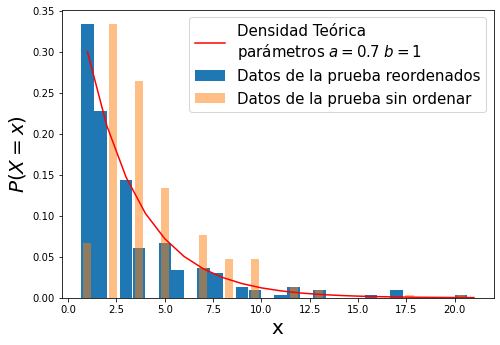

In [35]:
## Reordenamos para obtener "más independencia"
orden = np.argsort(muestra_log[:-1])
muestra_filaOrd = [muestra_fila[i] for i in orden]

a = 0.7
b = 1
c= b-a
datos_Ord = GeoTest(a,b,muestra_filaOrd)
x = [i for i in range(1,max(datos_Ord)+1)]
datos_NO_Ord= GeoTest(a,b,muestra_fila)

h, bins = np.histogram(datos_Ord,bins=30)
h = h/sum(h)
h2, bins2 = np.histogram(datos_NO_Ord,bins=30)
h2 = h2/sum(h2)

fig, ax = plt.subplots(1, 1)
ax = fig.add_axes([0,0,1,1])

# ax.set_title("Prueba Geométrica Filas \n con parámetros $a=$"+str(a)+" $b=$"+str(b),size =30)
ax.set_ylabel("$P(X=x)$",fontsize =20)
ax.set_xlabel("x",fontsize =20)
ax.plot(x,geom.pmf(x,c),color="red",label="Densidad Teórica\nparámetros $a=$"+str(a)+" $b=$"+str(b))
ax.bar(bins[:-1],h,width=((max(bins)-min(bins))/len(bins)),label="Datos de la prueba reordenados" )
ax.bar(bins[:-1],h2,width=((max(bins2)-min(bins2))/len(bins2)),label="Datos de la prueba sin ordenar",alpha=0.5 )
# ax.hist(datos,density=True,cumulative=True,bins=400,label="Distribución Mapeo")
# ax.plot(x,dens(x),color="red",label="Distribución Geométrica")
ax.legend(loc=0,markerscale=2,fontsize=15,title_fontsize=20)
plt.draw()
plt.savefig(dir+'R30/Independencia/R30_fila_PG.png', bbox_inches = "tight")
plt.show()